[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1TorKa_7Zp9FbONuDeCzNYek-rfgo4s1m?usp=sharing)

#Introduction to Scikit-Learn

##End-to-End Machine Learning Workflow with scikit-learn

This notebook walks through a complete machine learning pipeline using **scikit-learn**, from raw data to a tuned model. We will:

* **Load and explore** the dataset
* **Split** into features (`X`) and target (`y`)
* **Train** a baseline model (K-Nearest Neighbors Regressor)
* **Preprocess** data with `StandardScaler`
* **Build** a `Pipeline` to combine scaling and modeling
* **Tune** hyperparameters using `GridSearchCV` with K-Fold cross-validation
* **Evaluate** and visualize results to ensure robust generalization

By following this workflow, you will learn how to structure your code for clarity, avoid data leakage, and systematically improve model performance.


##Basics

###Importing Essential Libraries and dataset

In [ ]:
#Importation of required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt


###Loading the dataset

In [ ]:
# Load the dataset into memory once (avoid re-calling multiple times)
housing = fetch_california_housing()

# Print full description of the dataset
print(housing['DESCR'])  # Contains dataset context, feature info, and usage guidance

# Print the shape of features (X) and target (y)
print(housing.data.shape, housing.target.shape)  # (20640, 8) features and 20640 target values

# Print the first 6 feature names
print(housing.feature_names[:6])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

###Splitting the data into Features and Label

In [ ]:
#Split the California housing dataset into features (X) and target (y)
X, y = fetch_california_housing(return_X_y=True)

#Note:
#This is NOT a train-test split.
#This simply separates:
#X: input features (e.g., income, age, etc.)
#y: target values (median house value)


###Linear Regression

In [ ]:
#Model Linear Regessor
model = LinearRegression()
#Fitting the Linear regression model to data
model.fit(X, y)
#Prediction
model.predict(X)[:3] # 0 to 2 index predictions

array([4.13164983, 3.97660644, 3.67657094])

###KNN-Regressor

In [ ]:
#Model KneighborRegresson with neigbor 3
model = KNeighborsRegressor(n_neighbors=3)
#Model fit
model.fit(X, y)
#Model predict
prediction=model.predict(X)

###Matplotlib

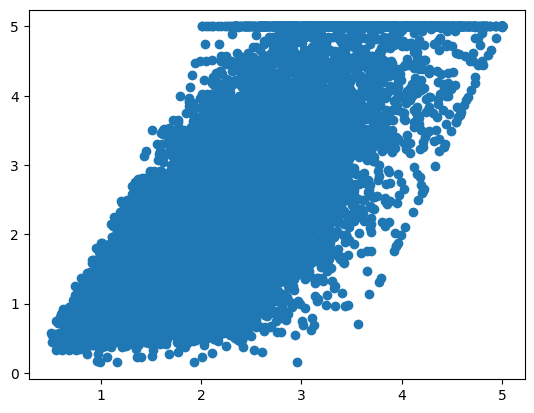

In [ ]:
#Matplotlib for visualization
plt.scatter(prediction,y)

##Pre-processing




###Model Imports: Classification vs Regression

In machine learning, the **K-Nearest Neighbors (KNN)** algorithm can be used for both:
- **Classification** → Predicts a class label (e.g., "spam" or "not spam")
- **Regression** → Predicts a continuous value (e.g., house price)

To use them:
- `KNeighborsClassifier` → for classification tasks
- `KNeighborsRegressor` → for regression tasks



In [ ]:
#Importing Requireed Library and models
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor






###Dataset Description

prints a **detailed textual description** of the Diabetes dataset:
- Source of the dataset
- What each feature represents
- Number of samples and features
- Type of target variable (regression target)
- Any preprocessing already applied



In [ ]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

###Splitting Features and Target from the Dataset

The `load_diabetes()` function returns both the features (`X`) and the target (`y`) of the Diabetes dataset.

- `X` contains all the **input features** (like BMI, blood pressure, etc.)
- `y` is the **target** — a continuous value representing disease progression (for regression tasks)



In [ ]:
#splitting the dataset into features and target

X,y=load_diabetes(return_X_y=True)



###Pipeline
A **Pipeline** in `scikit-learn` is a way to **chain multiple steps together**, typically:
- **Preprocessing**: like scaling or encoding features
- **Modeling**: fitting a machine learning algorithm

This ensures that **all steps are applied consistently** during training and testing, avoiding data leakage and improving code readability.

###StandardScaler
Many ML models (especially distance-based like KNN or gradient-based like SGD) perform poorly when features are on different scales.
- We're using `StandardScaler()` to standardize features before applying `KNeighborsClassifier` & `KNeighborsRegressor`.



###Pipeline 1 using knn-clasifier

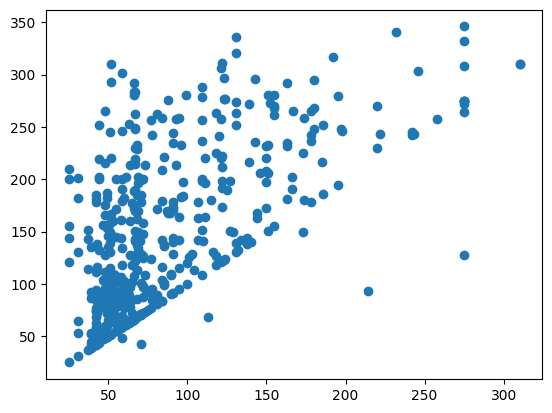

In [ ]:
#Pipeline 1 model classifier
pipe1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])
prediction = pipe1.fit(X, y).predict(X)
plt.scatter(prediction, y)

###Pipeline 2 using knn-regression

Tip: `n_neighbors=1` would mean the model memorizes the data — it just copies the output of the nearest point, which can lead to **overfitting**.


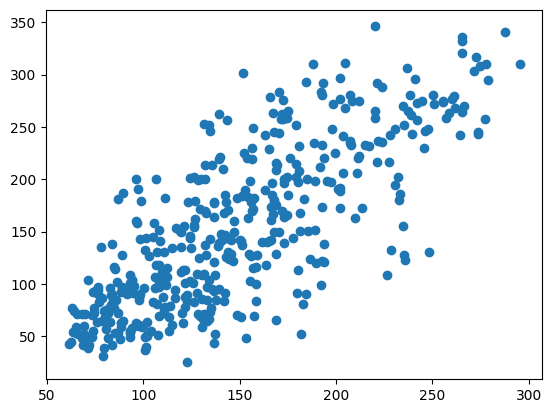

In [ ]:
#pipeline 2 regressor
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=5))# If n_neighbors = 1,we are just seeing the memorised data i.e no learning
])
prediction = pipe2.fit(X, y).predict(X)
plt.scatter(prediction, y)

##Tuning

###GridSearchCV

Grid Search Cross-Validation (Post-Pipeline Tuning)

**GridSearchCV** is a model selection tool that helps you:
- **Test multiple hyperparameter combinations** (like `n_neighbors` in KNN).
- Use **Cross-Validation** internally to find the best performing parameters.
- Automatically select the best model based on a scoring metric (like R² for regression).



###Importing Required Libraries

In [ ]:
#Importing the GridSearchCV
from sklearn.model_selection import GridSearchCV
import pandas as pd

###GridSearch on Pipe1
###Inside a pipeline.

- The **pipeline (`pipe1`)** includes:
  - `StandardScaler`: for feature scaling.
  - `KNeighborsClassifier`: for classification.
  
- `GridSearchCV` will:
  - Try each value of `n_neighbors` from 1 to 10.
  - Perform **3-fold cross-validation** for each.
  - Pick the best `n_neighbors` based on accuracy (by default for classifiers).



In [ ]:
model = GridSearchCV(estimator=pipe1,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
model.fit(X, y);

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


After fitting `GridSearchCV`, the object stores **detailed results** of each parameter combination it tried.  
You can convert these into a readable table using `pd.DataFrame(model.cv_results_)`.

This lets you analyze:
- What values of `n_neighbors` were tried.
- What their corresponding **mean accuracy**, **fit time**, and **rank** were.
- How consistent the model performed across the 3 folds (via std values).

In [ ]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002387,0.000257,0.003591,0.000052,1,{'model__n_neighbors': 1},0.013514,0.013605,0.000000,0.009040,0.006392,3
1,0.002235,0.000044,0.003785,0.000233,2,{'model__n_neighbors': 2},0.006757,0.000000,0.006803,0.004520,0.003196,8
2,0.002187,0.000025,0.003658,0.000149,3,{'model__n_neighbors': 3},0.000000,0.000000,0.013605,0.004535,0.006414,5
3,0.002337,0.000131,0.003782,0.000130,4,{'model__n_neighbors': 4},0.000000,0.006803,0.006803,0.004535,0.003207,5
4,0.002369,0.000155,0.003777,0.000008,5,{'model__n_neighbors': 5},0.000000,0.000000,0.006803,0.002268,0.003207,9
5,0.002552,0.000276,0.004088,0.000267,6,{'model__n_neighbors': 6},0.000000,0.000000,0.006803,0.002268,0.003207,9
6,0.002301,0.000078,0.003906,0.000030,7,{'model__n_neighbors': 7},0.000000,0.006803,0.006803,0.004535,0.003207,5
7,0.002276,0.000139,0.003857,0.000022,8,{'model__n_neighbors': 8},0.000000,0.006803,0.013605,0.006803,0.005554,4
8,0.002156,0.000027,0.004002,0.000199,9,{'model__n_neighbors': 9},0.000000,0.006803,0.020408,0.009070,0.008484,1
9,0.002164,0.000026,0.004441,0.000665,10,{'model__n_neighbors': 10},0.000000,0.006803,0.020408,0.009070,0.008484,1


###GridSearch on Pipe2
- The **pipeline (`pipe2`)** includes:
  - `StandardScaler`: for feature scaling.
  - `KNeighborsRegressor`: for classification.
  
- `GridSearchCV` will:
  - Try each value of `n_neighbors` from 1 to 10.
  - Perform **3-fold cross-validation** for each.
  - Pick the best `n_neighbors` based on accuracy .

In [ ]:
model=GridSearchCV(estimator=pipe2,param_grid={'model__n_neighbors':[1,3,5,7,9,]},cv=3)
model.fit(X,y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002014,0.000166,0.002365,0.000093,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,5
1,0.001731,0.000015,0.002436,0.000020,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,4
2,0.001729,0.000023,0.002523,0.000052,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,3
3,0.001738,0.000062,0.002719,0.000203,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,2
4,0.001910,0.000194,0.002947,0.000272,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,1


##Summary

### Steps

1. **Import**

   * Datasets, models, preprocessing, pipeline, CV, and utilities.

2. **Load & Split**

   ```python
   X, y = load_diabetes(return_X_y=True)
   ```

   Features `X`, target `y`.

3. **Baseline Fit & Predict**

   ```python
   model = KNeighborsRegressor(n_neighbors=5)
   model.fit(X, y)
   model.predict(X)
   ```

   Quick check on raw data.

4. **Preprocess**

   * Scale features: `StandardScaler()`.

5. **Build Pipeline**

   ```python
   pipe = Pipeline([
     ('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())
   ])
   ```

6. **Pipeline Fit & Predict**

   ```python
   pipe.fit(X, y)
   pipe.predict(X)
   ```

7. **Hyperparameter Tuning**

   ```python
   param_grid = {'model__n_neighbors': [1, 3, 5, 7, 9]}
   grid = GridSearchCV(pipe, param_grid, cv=3)
   grid.fit(X, y)
   ```

8. **Inspect Results**

   ```python
   pd.DataFrame(grid.cv_results_)
   ```

   View mean scores, parameters, and rankings.


##  Navigation

[![➡️ Pre-Processing](https://img.shields.io/badge/Next-PreProcessing-000000?style=for-the-badge&logo=github&logoColor=00FF80)](https://github.com/aypy01/scikit-learn/tree/main/preprocessing)
&nbsp;&nbsp;&nbsp;&nbsp;


## Author
 <p align="left">
  Created and maintained by
  <a href="https://github.com/aypy01" target="_blank">&nbsp Aaditya Yadav</a>&nbsp
  <a href="https://github.com/aypy01" target="_blank">
    <img src="https://img.shields.io/badge/aypy01-000000?style=flat-square&logo=github&logoColor=00FF80" alt="GitHub Badge"/>
  </a>
</p>

</p>
<p align="left">
  <img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>


## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).